OBJECTIVE:
Perform KNN classification using 10 fold cross validation, on Amazon Fine food reviews to predict the polarity of the review as either 'Positive' or 'Negative'. The KNN is to be performed via brute froce and Kd-tree implemetation on all text vectorization models such as:
1)Bag of Words
2)TF-IDF
3)Avg Word2Vec
4)TF-IDF Word2Vec

Come up with the optimal K using the 10-fold cross validation technique and use the same to predict the future TEST data and determine the accuracy for the same.

In [1]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import warnings
import sqlite3
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

warnings.filterwarnings("ignore")
# =============================================================================================

c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading the final dataset of AFF after Data preprocessing and removing duplicates done previously in TSNE

con = sqlite3.connect('C:\\Users\\rahul\\Desktop\\AI COURSE\\Amazon Fine food\\amazon-fine-food-reviews (1)\\final.sqlite')

In [3]:
data = pd.read_sql_query("""SELECT * FROM REVIEWS """,con)
print(data.shape)

#check no of Positive and negative reviews present
data['Score'].value_counts()

#Performing Time based slicing on the data
sorted_data = data.sort_values('Time')

#since facing memory issue just taking 20k data points
sample_data = sorted_data.sample(n=20000)

print(sample_data.shape)


(364171, 12)
(20000, 12)


In [19]:
label = sample_data['Score']

# split the data set into train and test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(sample_data, label, test_size=0.3, random_state=0)

type(sample_data)

pandas.core.frame.DataFrame

BOW MODEL:

In [20]:
#Bag of words using Scikit learn
count_vect = CountVectorizer()
vocab = count_vect.fit(X_train['CleanedText'].values)
type(vocab)

#Using the vocab obtained in train to vectorize both train and test data
X_train = vocab.transform(X_train['CleanedText'].values)
X_test = vocab.transform(X_test['CleanedText'].values)

In [21]:
#Standardise the Data as part of data pre-processing for KNN

from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler(copy=True, with_mean=False, with_std=True).fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(14000, 15021)
(6000, 15021)


In [8]:
#function to find the optimal k in KNN for 10 fold cross validation
def find_optimal_k(x,y,n,algo):
    # creating odd list of K for KNN
    myList = list(range(0,50))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold cv scores
    cv_scores = []

# perform 10-fold cross validation using Brute force

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm=algo)
        scores = cross_val_score(knn, x, y, cv=n, scoring='accuracy')
        cv_scores.append(scores.mean())

# changing to misclassification error (error = 1 - accuracy)
    MSE = [1 - x for x in cv_scores]

# determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(neighbors, MSE)

    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
# plot misclassification error vs k 
    

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    return optimal_k
    
    # ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k

#function to predict the label of test data and return the same as list 
def pred_test_data(x_tr,y_tr,x_tst,y_tst,optimal_k,algo):
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm=algo)

    # fitting the model
    knn_optimal.fit(x_tr, y_tr)

    # predict the response
    pred = knn_optimal.predict(x_tst)

    # evaluate accuracy
    acc = accuracy_score(y_tst, pred) * 100
    print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
    return pred

#Function to create Confusion matrix creation and plotting the same
def confusion_heatmap(x,y):
    cnf_mat = confusion_matrix(x,y)
    sns.heatmap(cnf_mat,cbar_kws={'label': 'colorbar title'},cmap='YlGnBu',linewidths=2, linecolor='yellow')


The optimal number of neighbors is 5.


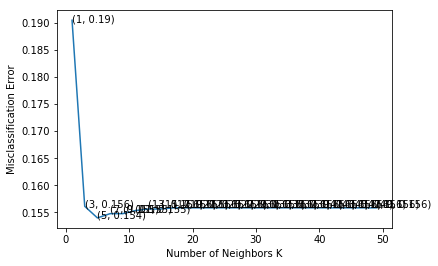

the misclassification error for each k value is :  [0.19  0.156 0.154 0.155 0.155 0.155 0.156 0.156 0.156 0.156 0.156 0.156
 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156
 0.156]


In [9]:
opt_k = find_optimal_k(X_train,y_train,10,'brute')

In [29]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'brute')
type(y_pred)


The accuracy of the knn classifier for k = 5 is 85.483333%


6000

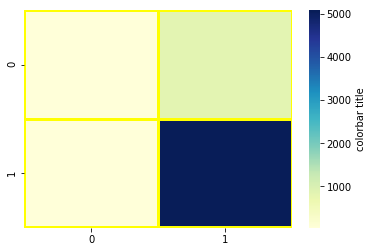

In [41]:
confusion_heatmap(y_test,y_pred)


The optimal number of neighbors is 7.


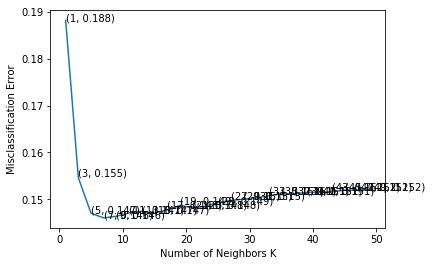

the misclassification error for each k value is :  [0.188 0.155 0.147 0.146 0.146 0.147 0.147 0.147 0.148 0.149 0.148 0.148
 0.149 0.15  0.15  0.15  0.151 0.151 0.151 0.151 0.151 0.152 0.152 0.152
 0.152]


In [22]:
#Performing the KNN using kd tree

#As kd-tree does not accept sparse matrix, convert data into lesser dimensions using truncated SVD
svd = TruncatedSVD(n_components = 300)
trunc_svd = svd.fit(X_train)
X_train = trunc_svd.transform(X_train)
#print(svd.explained_variance_ratio_) 

X_test = trunc_svd.transform(X_test)
#print(svd.explained_variance_ratio_) 


opt_k = find_optimal_k(X_train,y_train,10,'kd_tree')




In [23]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'kd_tree')
type(y_pred)



The accuracy of the knn classifier for k = 7 is 84.483333%


numpy.ndarray

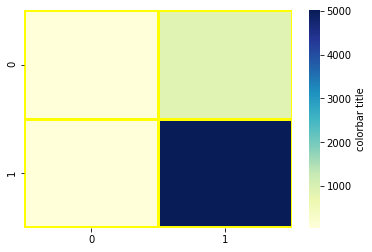

In [12]:
confusion_heatmap(y_test,y_pred)

Conclusion:
1.KNN using 10-fold validation was performed on a sample dataset of AFF for Bag of words.
2.Both brute force and kd-tree implementation was done for the same.
3.We chose the standard 70-30 split i.e. 70% as train data and 30% as test data.
4.The optimal k in case of brute force was 5 and for kd-tree it was 7.
5.The accuracy in case of brute force was 84.48(approx) and for kd-tree it was 84.45(approx).
6.Since there were memory issues, only a sample 20k dataset had been chosen.
7.Confusion matrix was plotted for the same.

TF-IDF MODEL:

In [13]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(sample_data, label, test_size=0.3, random_state=0)
#Converting text into vector using tfidf vectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
vocab = tf_idf_vect.fit(X_train['CleanedText'].values)
X_train = vocab.transform(X_train['CleanedText'].values)
X_test = vocab.transform(X_test['CleanedText'].values)

type(X_train)

scipy.sparse.csr.csr_matrix

In [14]:
#Standardise the Data as part of data pre-processing for KNN

Scaler = StandardScaler(copy=True, with_mean=False, with_std=True).fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(14000, 297684)
(6000, 297684)



The optimal number of neighbors is 1.


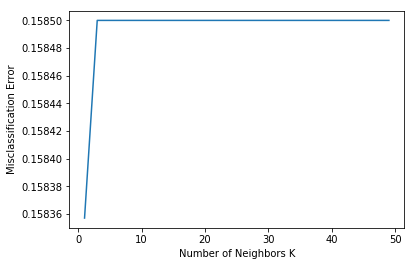

the misclassification error for each k value is :  [0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158
 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158
 0.158]


In [123]:
opt_k = find_optimal_k(X_train,y_train,10,'brute')

In [52]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'brute')
type(y_pred)



The accuracy of the knn classifier for k = 1 is 85.300000%


numpy.ndarray

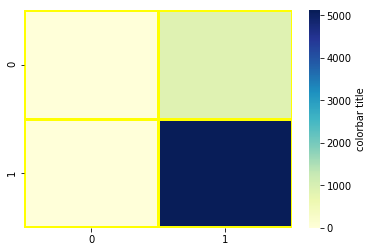

In [53]:
confusion_heatmap(y_test,y_pred)


The optimal number of neighbors is 39.


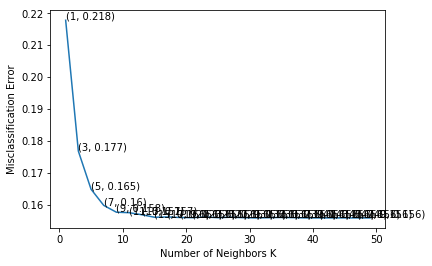

the misclassification error for each k value is :  [0.218 0.177 0.165 0.16  0.158 0.157 0.157 0.156 0.156 0.156 0.156 0.156
 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156
 0.156]


In [15]:
#Performing the KNN using kd tree

#As kd-tree does not accept sparse matrix, convert data into lesser dimensions using truncated SVD
svd = TruncatedSVD(n_components = 300)
trunc_svd = svd.fit(X_train)
X_train = trunc_svd.transform(X_train)
#print(svd.explained_variance_ratio_) 

X_test = trunc_svd.transform(X_test)
#print(svd.explained_variance_ratio_) 


opt_k = find_optimal_k(X_train,y_train,10,'kd_tree')



In [16]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'kd_tree')
type(y_pred)



The accuracy of the knn classifier for k = 39 is 84.300000%


numpy.ndarray

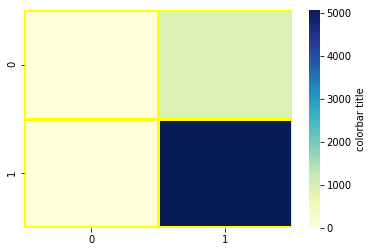

In [17]:
confusion_heatmap(y_test,y_pred)

Conclusion:
1.KNN using 10-fold validation was performed on a sample dataset of AFF for TF-IDF model.
2.Both brute force and kd-tree implementation was done for the same.
3.We chose the standard 70-30 split i.e. 70% as train data and 30% as test data.
4.The optimal k in case of brute force was 1 and for kd-tree it was 39.
5.The accuracy in case of brute force was 85.3(approx) and for kd-tree it was 84.3(approx).
6.We get same accuracy for both the implementation but the optimal k varies. Since there were memory issues, only a sample 20k dataset had been chosen.
7.Confusion matrix was plotted for the same.

AVERAGE WORD2VEC MODEL:

In [70]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(sample_data, label, test_size=0.3, random_state=0)
#fetching the list of sentences from cleanedtext column of our train data for word2vec model
i=0
list_of_sent=[]
for sent in X_train['CleanedText'].values:
    list_of_sent.append(sent.split())

In [71]:
from gensim.models import Word2Vec

# min_count = 5 considers only words that occured atleast 3 times
w2v_model=Word2Vec(list_of_sent,min_count=3,size=50, workers=4)

In [73]:
w2v_words = list(w2v_model.wv.vocab)

# average Word2Vec
# compute average word2vec for each review.
sent_train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_train_vectors.append(sent_vec)
print(len(sent_train_vectors))
print(len(sent_train_vectors[0]))
 

14000
50


In [74]:
i=0
list_of_sent=[]
for sent in X_test['CleanedText'].values:
    list_of_sent.append(sent.split())

In [75]:
sent_test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_test_vectors.append(sent_vec)
print(len(sent_test_vectors))
print(len(sent_test_vectors[0]))
 

6000
50



The optimal number of neighbors is 31.


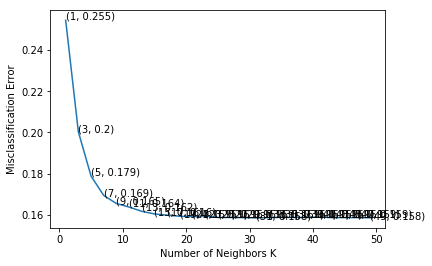

the misclassification error for each k value is :  [0.255 0.2   0.179 0.169 0.165 0.164 0.162 0.16  0.16  0.159 0.159 0.159
 0.159 0.159 0.159 0.158 0.159 0.159 0.159 0.159 0.159 0.159 0.159 0.159
 0.158]


In [76]:
# X_train = sent_train_vectors
# X_test = sent_test_vectors

Scaler = StandardScaler(copy=True, with_mean=False, with_std=True).fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

opt_k = find_optimal_k(X_train,y_train,10,'brute')

In [80]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'brute')
type(y_pred)



The accuracy of the knn classifier for k = 31 is 85.233333%


numpy.ndarray

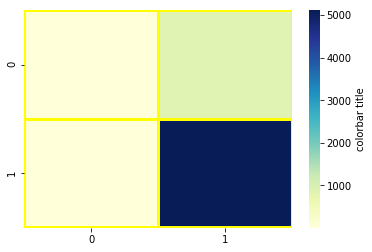

In [81]:
confusion_heatmap(y_test,y_pred)


The optimal number of neighbors is 31.


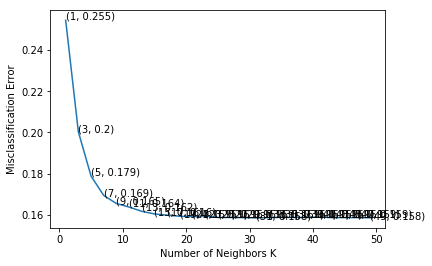

the misclassification error for each k value is :  [0.255 0.2   0.179 0.169 0.165 0.164 0.162 0.16  0.16  0.159 0.159 0.159
 0.159 0.159 0.159 0.158 0.159 0.159 0.159 0.159 0.159 0.159 0.159 0.159
 0.158]


In [82]:
opt_k = find_optimal_k(X_train,y_train,10,'kd_tree')

In [83]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'kd_tree')
type(y_pred)



The accuracy of the knn classifier for k = 31 is 85.233333%


numpy.ndarray

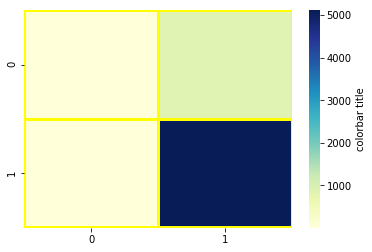

In [84]:
confusion_heatmap(y_test,y_pred)

Conclusion:
1.KNN using 10-fold validation was performed on a sample dataset of AFF for Average word2vec.
2.Both brute force and kd-tree implementation was done for the same.
3.We chose the standard 70-30 split i.e. 70% as train data and 30% as test data.
4.The optimal k in case of brute force was 31 and for kd-tree it was 31.
5.The accuracy in case of brute force was 85.23(approx) and for kd-tree it was 85.23(approx).
6.We get same values of optimal k and accuracy for both the implementation. Since there were memory issues, only a sample 20k dataset had been chosen.
7.Confusion matrix was plotted for the same.

KNN on TF-IDF Word2vec MODEL:

In [95]:
# TF-IDF weighted Word2Vec
X_train, X_test, y_train, y_test = cross_validation.train_test_split(sample_data, label, test_size=0.3, random_state=0)
#fetching the list of sentences from cleanedtext column of our train data for word2vec model

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))

# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
vocab = tf_idf_vect.fit(X_train['CleanedText'].values)
X_train_tfidf = vocab.transform(X_train['CleanedText'].values)
X_test_tfidf = vocab.transform(X_test['CleanedText'].values)

tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names

type(X_train)

tfidf_train_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = X_train_tfidf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_train_vectors.append(sent_vec)
    row += 1

X_train = tfidf_train_vectors

In [96]:
i=0
list_of_sent=[]
for sent in X_test['CleanedText'].values:
    list_of_sent.append(sent.split())

tfidf_test_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;

for sent in list_of_sent: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = X_test_tfidf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_test_vectors.append(sent_vec)
    row += 1

X_test = tfidf_test_vectors

In [104]:
Scaler = StandardScaler(copy=True, with_mean=False, with_std=True).fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)


The optimal number of neighbors is 21.


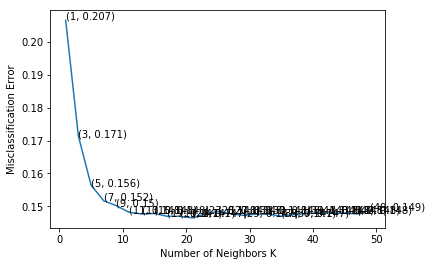

the misclassification error for each k value is :  [0.207 0.171 0.156 0.152 0.15  0.148 0.148 0.148 0.147 0.147 0.147 0.148
 0.148 0.148 0.147 0.148 0.148 0.147 0.147 0.148 0.148 0.148 0.148 0.148
 0.149]


In [105]:
opt_k = find_optimal_k(X_train,y_train,10,'brute')

In [106]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'brute')
type(y_pred)



The accuracy of the knn classifier for k = 21 is 86.133333%


numpy.ndarray

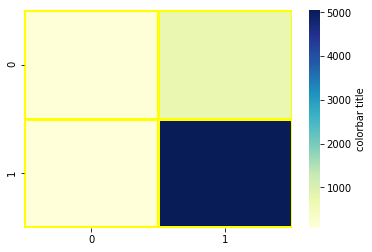

In [107]:
confusion_heatmap(y_test,y_pred)


The optimal number of neighbors is 21.


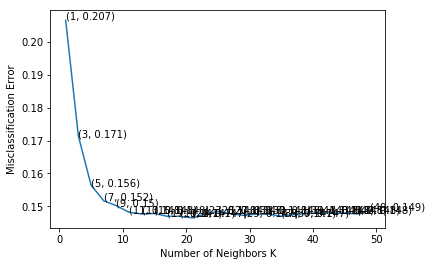

the misclassification error for each k value is :  [0.207 0.171 0.156 0.152 0.15  0.148 0.148 0.148 0.147 0.147 0.147 0.148
 0.148 0.148 0.147 0.148 0.148 0.147 0.147 0.148 0.148 0.148 0.148 0.148
 0.149]


In [108]:
opt_k = find_optimal_k(X_train,y_train,10,'kd_tree')

In [109]:
y_pred = pred_test_data(X_train,y_train,X_test,y_test,opt_k,'kd_tree')
type(y_pred)



The accuracy of the knn classifier for k = 21 is 86.133333%


numpy.ndarray

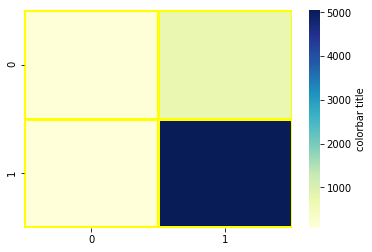

In [110]:
confusion_heatmap(y_test,y_pred)

Conclusion:
1.KNN using 10-fold validation was performed on a sample dataset of AFF for TF-IDF model.
2.Both brute force and kd-tree implementation was done for the same.
3.We chose the standard 70-30 split i.e. 70% as train data and 30% as test data.
4.The optimal k in case of brute force was 27 and for kd-tree it was 27.
5.The accuracy in case of brute force was 86.03%(approx) and for kd-tree it was 86.03%(approx).
6.We get same values of optimal k and accuracy for both the implementation. Since there were memory issues, only a sample 20k dataset had been chosen.
7.Confusion matrix was plotted for the same.

In [24]:
from prettytable import PrettyTable
    
x = PrettyTable(["MODEL", "HYPERPARAMETER", "ALGORITHM", "TRAIN ERROR", "TEST ERROR"])

x.add_row(["Bag of Words",5, 'BRUTE', .155,.156])
x.add_row(["Bag of Words",7, 'Kd_tree', .147,.155])
x.add_row(["TF-IDF",1, 'BRUTE', .148,.147])
x.add_row(["TF-IDF",39, 'Kd_tree', .156,.157])
x.add_row(["Avg. word2vec",31, 'BRUTE', .148,.148])
x.add_row(["Avg. word2vec",31, 'Kd_tree', .148,.148])
x.add_row(["TF-IDF Avg. word2vec",21, 'BRUTE', .147,.139])
x.add_row(["TF-IDF Avg. word2vec",21, 'Kd_tree', .147,.139])

print(x)

+----------------------+----------------+-----------+-------------+------------+
|        MODEL         | HYPERPARAMETER | ALGORITHM | TRAIN ERROR | TEST ERROR |
+----------------------+----------------+-----------+-------------+------------+
|     Bag of Words     |       5        |   BRUTE   |    0.155    |   0.156    |
|     Bag of Words     |       7        |  Kd_tree  |    0.147    |   0.155    |
|        TF-IDF        |       1        |   BRUTE   |    0.148    |   0.147    |
|        TF-IDF        |       39       |  Kd_tree  |    0.156    |   0.157    |
|    Avg. word2vec     |       31       |   BRUTE   |    0.148    |   0.148    |
|    Avg. word2vec     |       31       |  Kd_tree  |    0.148    |   0.148    |
| TF-IDF Avg. word2vec |       21       |   BRUTE   |    0.147    |   0.139    |
| TF-IDF Avg. word2vec |       21       |  Kd_tree  |    0.147    |   0.139    |
+----------------------+----------------+-----------+-------------+------------+


FINAL CONCLUSION:
1.KNN using 10-fold cross validation was performed on Amazon Fine Food reviews dataset.
2.KNN was done on various Text processing techniques like Bag of words, TF-IDF, Average Word2vec and TF-IDF Word2vec.
3.KNN performed surprisingly well for our dataset with good accuracies and test errors of .154, .147, .148 and .139 for Bag of words, TF-IDF, Average-word2vec and Tf-IDF word2vec respectively.
4.Although all models performed really well, TF-IDF Avg. Word2vec has lowest test error of .139.
5.The Confusion matrices was plotted using heat map for all the models.
6.The accuracies computed were in a sampled data set(Due to low memory issues) and it may reduce when applied on the dataset on its entirety.